In [1]:
from PARAM import *

from math import pi

import csv
import numpy as np
import matplotlib.pyplot as plt


from model_Trains import Trains
from model_Aproximators import Aproximators
from model_DataGenerator import DataGenerator


from Base import *
from testTrains import testTrains

from model_Trace import Trace

import os
import csv
from tqdm import tqdm

In [2]:
def draw(X, Y, folder, file, xlabel, ylabel):
    plt.plot(X, Y)

    ax = plt.gca()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()
    plt.savefig("{}/{}.png".format(folder, file))
    plt.close()

def draw_err(X,Y, folder, file, ylim = [0, 0.15]):
    plt.ylim(ylim[0],ylim[1])

    Z = [Y[0] for i in Y]
    d = 50

    for r in range(len(Y)):
        l = max(0, r+1-d)
        buf = Y[l:r+1]
        Z[r] = sum(buf)/len(buf)

    plt.plot(X,Z)

    plt.xlabel("t, c")
    plt.ylabel("E(t), м")

    ax = plt.gca()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()
    plt.savefig("{}/{}.png".format(folder, file))
    plt.close()
    
    
def printLine(line):
    print("{}\t{:.4}\t{:.4}\t{:.4}\t{:.4}\t{:.4}".format(
        line[0],
        line[1].replace(",","."),
        line[2].replace(",","."),
        line[3].replace(",","."),
        line[4].replace(",","."),
        line[5].replace(",",".")
    ))
    
    
def printTable(E, times, S, folder):
    with open("{}/table.csv".format(folder) , "w", encoding='cp1251',newline='') as csv_file:
        writer = csv.writer(csv_file, delimiter=';', dialect=csv.excel_tab)


        line = ["Алгоритм", "Макс. отклонение, м", "Среднее отклонение, м","СКО, м", "СКО/S", "Время шага, мс"]
        writer.writerow(line)
        print("{}\t{}\t{}\t{}\t{}\t{}".format(line[0],line[1],line[2],line[3],line[4],line[5]))

        for name, e, t in zip(["Оригинальный", "Фурье", "Равноускоренный", "Тряска"], E, times):
            SKO = (sum([_e**2 for _e in e])/len(e))**0.5

            line[0] = name
            line[1] = str(max(e)).replace(".",",")
            line[2] = str(sum(e)/len(e)).replace(".",",")
            line[3] = str(SKO).replace(".",",")
            line[4] = str(SKO/S).replace(".",",")
            line[5] = str(sum(t)/len(t)*1000).replace(".",",")

            
            printLine(line)
            writer.writerow(line)
        writer.writerow(["S= ", str(S).replace(".",",")])
        print("S= {:.4f}".format(S))

In [3]:
def go(traces, steps = 2400):
    for trace in traces:
        try:
            os.mkdir(trace)
        except:
            pass


        orig, E2, E3, times = run(
            testTrains(1/10),
            DataGenerator["Generators"][0](
                Trace[trace](),
                epsU = epsU,
                epsZR = epsZR,
                epsZO = epsZO
            ),
            steps = steps
        )

        T = [i for i in range(steps)]
        draw(orig[0],orig[1], trace, "1. XY", "X, м", "Y, м")
        draw(T, orig[0], trace, "2. Xt", "t, с", "X(t), м")
        draw(T, orig[1], trace, "3. Yt", "t, c", "Y(t), м")

        draw_err(T, E2[0], trace, "4. Оригинальный")
        draw_err(T, E2[1], trace, "5. Фурье")
        draw_err(T, E2[2], trace, "6. Равноускоренны")
        draw_err(T, E2[3], trace, "7. Тряска")


        printTable(E2, times, orig[2], trace)
    print("Done")

In [4]:
def go(trace, steps = 2400):
    try:
        os.mkdir(trace)
    except:
        pass


    orig, E2, E3, times = run(
        testTrains(1/10),
        DataGenerator["Generators"][0](
            Trace[trace](),
            epsU = epsU,
            epsZR = epsZR,
            epsZO = epsZO
        ),
        steps = steps
    )

    T = [i for i in range(steps)]
    draw(orig[0],orig[1], trace, "1. XY", "X, м", "Y, м")
    draw(T, orig[0], trace, "2. Xt", "t, с", "X(t), м")
    draw(T, orig[1], trace, "3. Yt", "t, c", "Y(t), м")

    draw_err(T, E2[0], trace, "4. Оригинальный")
    draw_err(T, E2[1], trace, "5. Фурье")
    draw_err(T, E2[2], trace, "6. Равноускоренны")
    draw_err(T, E2[3], trace, "7. Тряска")


    printTable(E2, times, orig[2], trace)

In [5]:
traces = [
    "Line",   # 0
    "Circle", # 1
    "Snake",  # 2
    "Random", # 3
]

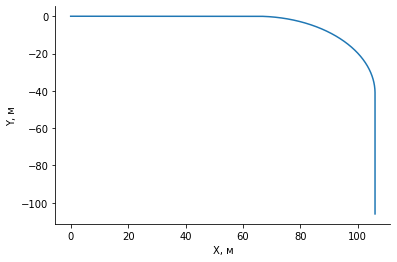

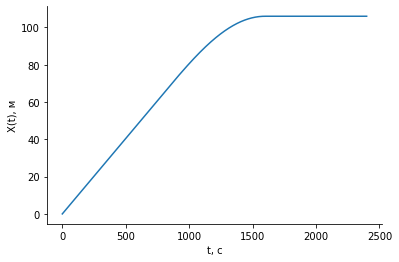

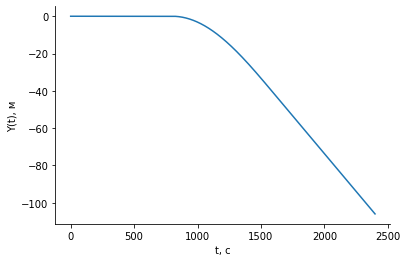

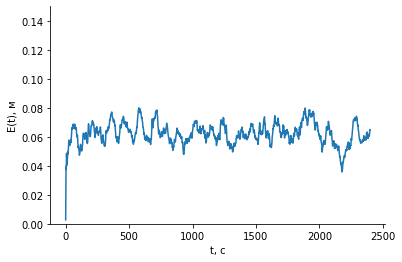

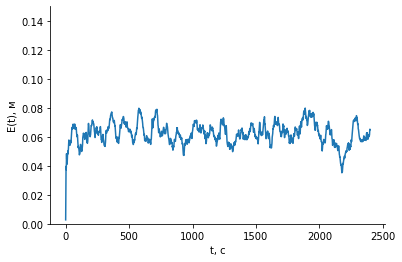

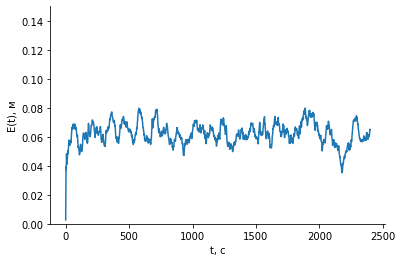

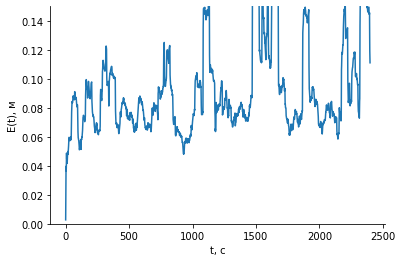

Алгоритм	Макс. отклонение, м	Среднее отклонение, м	СКО, м	СКО/S	Время шага, мс
Оригинальный	0.18	0.06	0.06	0.00	0.06
Фурье	0.18	0.06	0.07	0.00	0.19
Равноускоренный	0.18	0.06	0.07	0.00	0.08
Тряска	3.34	0.09	0.19	0.00	0.12
S= 194.3190


In [6]:
go(traces[0], length)

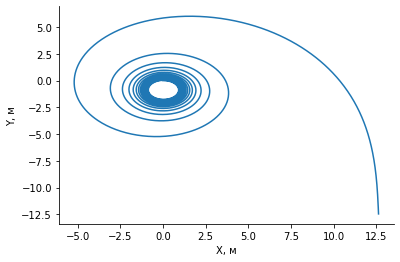

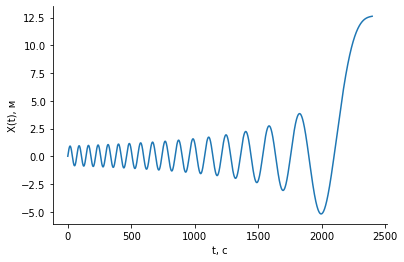

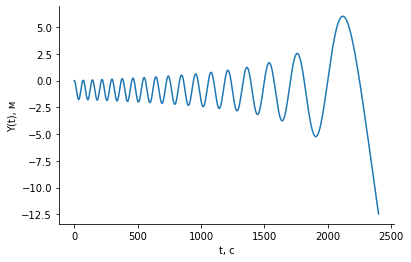

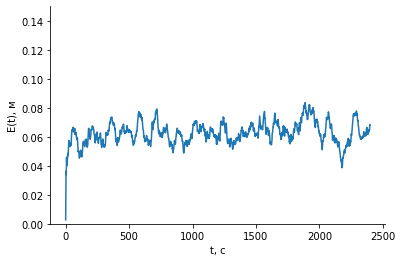

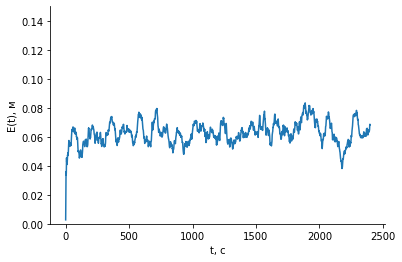

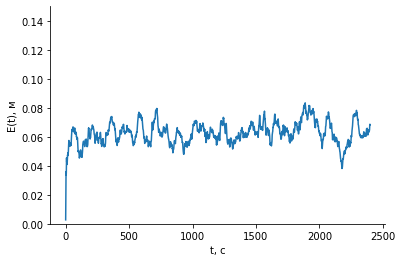

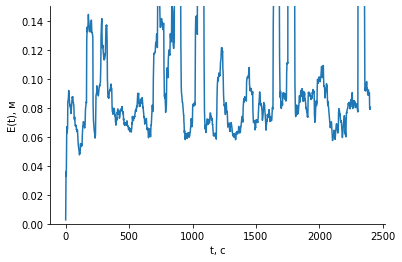

Алгоритм	Макс. отклонение, м	Среднее отклонение, м	СКО, м	СКО/S	Время шага, мс
Оригинальный	0.18	0.06	0.07	0.00	0.05
Фурье	0.18	0.06	0.07	0.00	0.17
Равноускоренный	0.18	0.06	0.07	0.00	0.07
Тряска	9.59	0.10	0.34	0.00	0.10
S= 196.9875


In [7]:
go(traces[1], length)

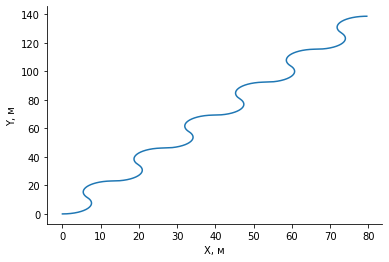

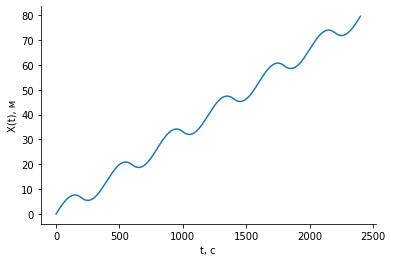

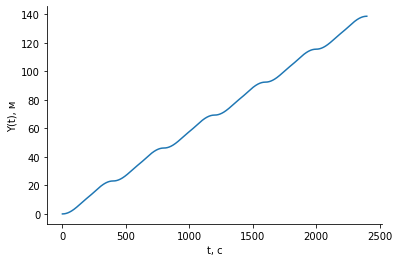

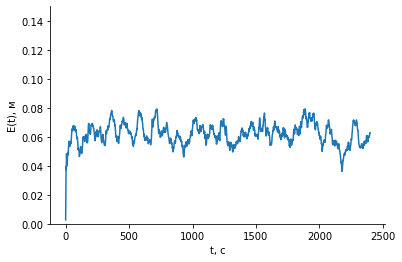

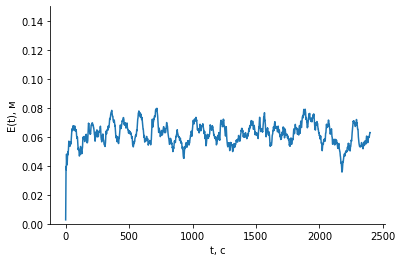

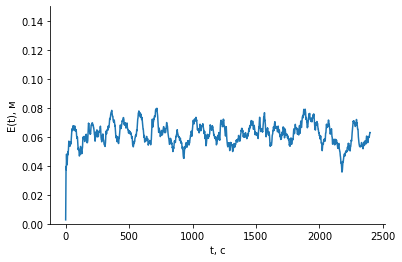

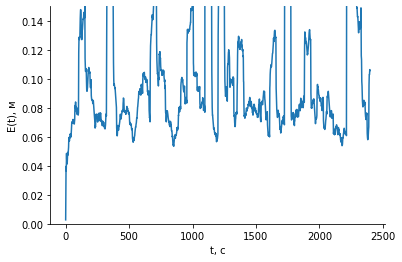

Алгоритм	Макс. отклонение, м	Среднее отклонение, м	СКО, м	СКО/S	Время шага, мс
Оригинальный	0.18	0.06	0.06	0.00	0.07
Фурье	0.18	0.06	0.06	0.00	0.20
Равноускоренный	0.18	0.06	0.06	0.00	0.08
Тряска	20.5	0.11	0.50	0.00	0.12
S= 194.3198


In [8]:
go(traces[2], length)

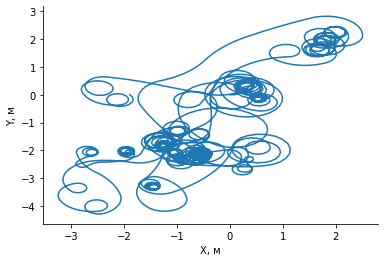

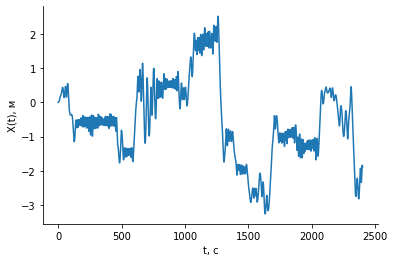

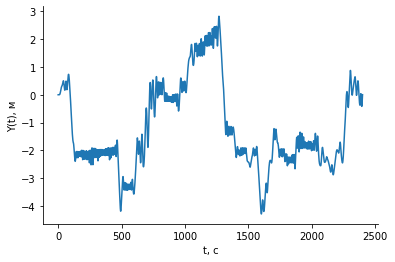

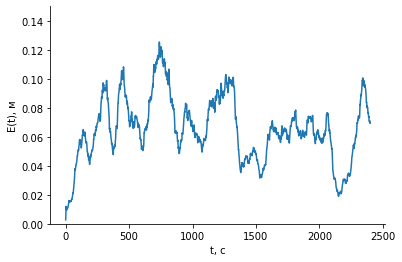

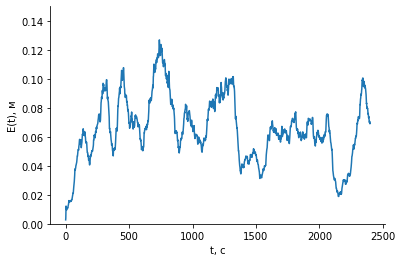

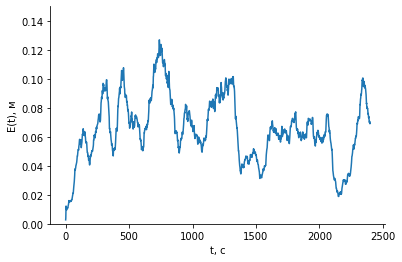

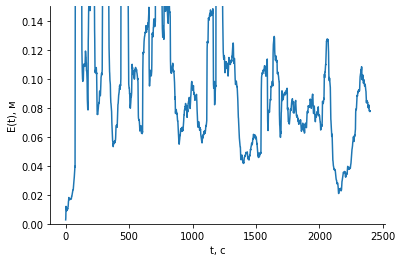

Алгоритм	Макс. отклонение, м	Среднее отклонение, м	СКО, м	СКО/S	Время шага, мс
Оригинальный	0.27	0.06	0.07	0.00	0.06
Фурье	0.27	0.06	0.07	0.00	0.19
Равноускоренный	0.27	0.06	0.07	0.00	0.08
Тряска	4.62	0.10	0.27	0.00	0.12
S= 225.7679


In [9]:
go(traces[3], length)